In [1]:
from tensorflow.keras.applications import Xception
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam

In [2]:
datagen = ImageDataGenerator()  # No validation split needed

train_data = datagen.flow_from_directory(
    'D:/Engineering/6th Semester/Advanced AI and ML/Poster/Main Dataset/seg_train/seg_train',
    target_size=(229, 229),
    batch_size=8,
    class_mode='categorical'
)

val_data = datagen.flow_from_directory(
    'D:/Engineering/6th Semester/Advanced AI and ML/Poster/Main Dataset/seg_test/seg_test',
    target_size=(229, 229),
    batch_size=8,
    class_mode='categorical'
)


Found 1500 images belonging to 6 classes.
Found 1500 images belonging to 6 classes.


In [3]:
base_model = Xception(weights='imagenet', include_top=False, input_shape=(229, 229, 3))

In [4]:
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
predictions = Dense(train_data.num_classes, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)


In [5]:
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])


In [6]:
history=model.fit(train_data, validation_data=val_data, epochs=5)

C:\Users\vivek\AppData\Roaming\Python\Python312\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
188/188 ━━━━━━━━━━━━━━━━━━━━ 2954s 14s/step - accuracy: 0.5146 - loss: 1.3656 - val_accuracy: 0.6460 - val_loss: 1.0205
Epoch 2/5
188/188 ━━━━━━━━━━━━━━━━━━━━ 3128s 17s/step - accuracy: 0.7080 - loss: 0.8584 - val_accuracy: 0.5420 - val_loss: 1.5289
Epoch 3/5
188/188 ━━━━━━━━━━━━━━━━━━━━ 2761s 15s/step - accuracy: 0.7543 - loss: 0.6525 - val_accuracy: 0.6080 - val_loss: 2.3569
Epoch 4/5
188/188 ━━━━━━━━━━━━━━━━━━━━ 2079s 11s/step - accuracy: 0.8026 - loss: 0.5443 - val_accuracy: 0.8487 - val_loss: 0.4573
Epoch 5/5
188/188 ━━━━━━━━━━━━━━━━━━━━ 1196s 6s/step - accuracy: 0.8527 - loss: 0.4186 - val_accuracy: 0.6040 - val_loss: 6.2337


In [10]:
val_loss, val_accuracy = model.evaluate(val_data)
print(f"\nValidation Accuracy: {val_accuracy * 100:.2f}%")
print(f"Validation Loss: {val_loss*100:.4f}")


188/188 ━━━━━━━━━━━━━━━━━━━━ 167s 891ms/step - accuracy: 0.6078 - loss: 5.7575

Validation Accuracy: 60.40%
Validation Loss: 623.3748


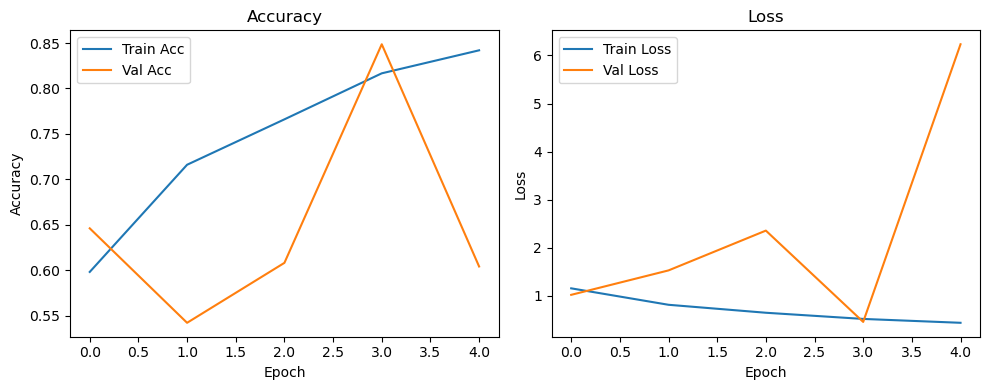

In [12]:
import matplotlib.pyplot as plt 
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.show()


In [14]:
import numpy as np
Y_pred = model.predict(val_data)
y_pred = np.argmax(Y_pred, axis=1)
y_true = val_data.classes

188/188 ━━━━━━━━━━━━━━━━━━━━ 179s 937ms/step


In [16]:
from sklearn.metrics import classification_report,confusion_matrix
class_names = list(train_data.class_indices.keys())
print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=class_names))


Classification Report:
              precision    recall  f1-score   support

   buildings       0.18      0.30      0.23       250
      forest       0.13      0.12      0.13       250
     glacier       0.21      0.14      0.16       250
    mountain       0.16      0.36      0.22       250
         sea       0.19      0.04      0.07       250
      street       0.24      0.08      0.12       250

    accuracy                           0.17      1500
   macro avg       0.18      0.17      0.16      1500
weighted avg       0.18      0.17      0.16      1500



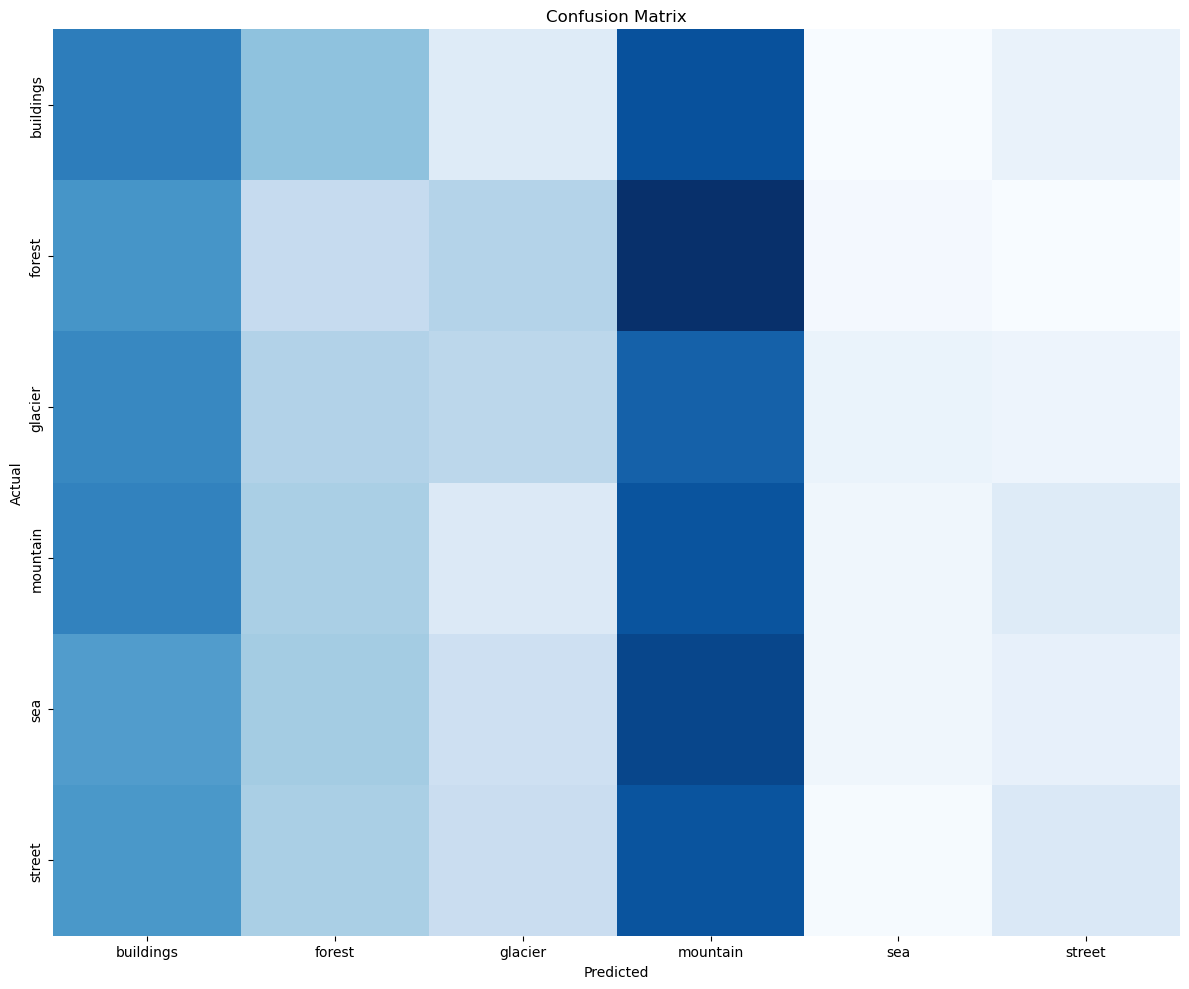

In [17]:
import seaborn as sns
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(12, 10))
sns.heatmap(cm, cmap='Blues', xticklabels=class_names, yticklabels=class_names, cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

In [18]:
x_sample, y_sample = next(val_data)
y_true_sample = np.argmax(y_sample, axis=1)
y_pred_sample = np.argmax(model.predict(x_sample), axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


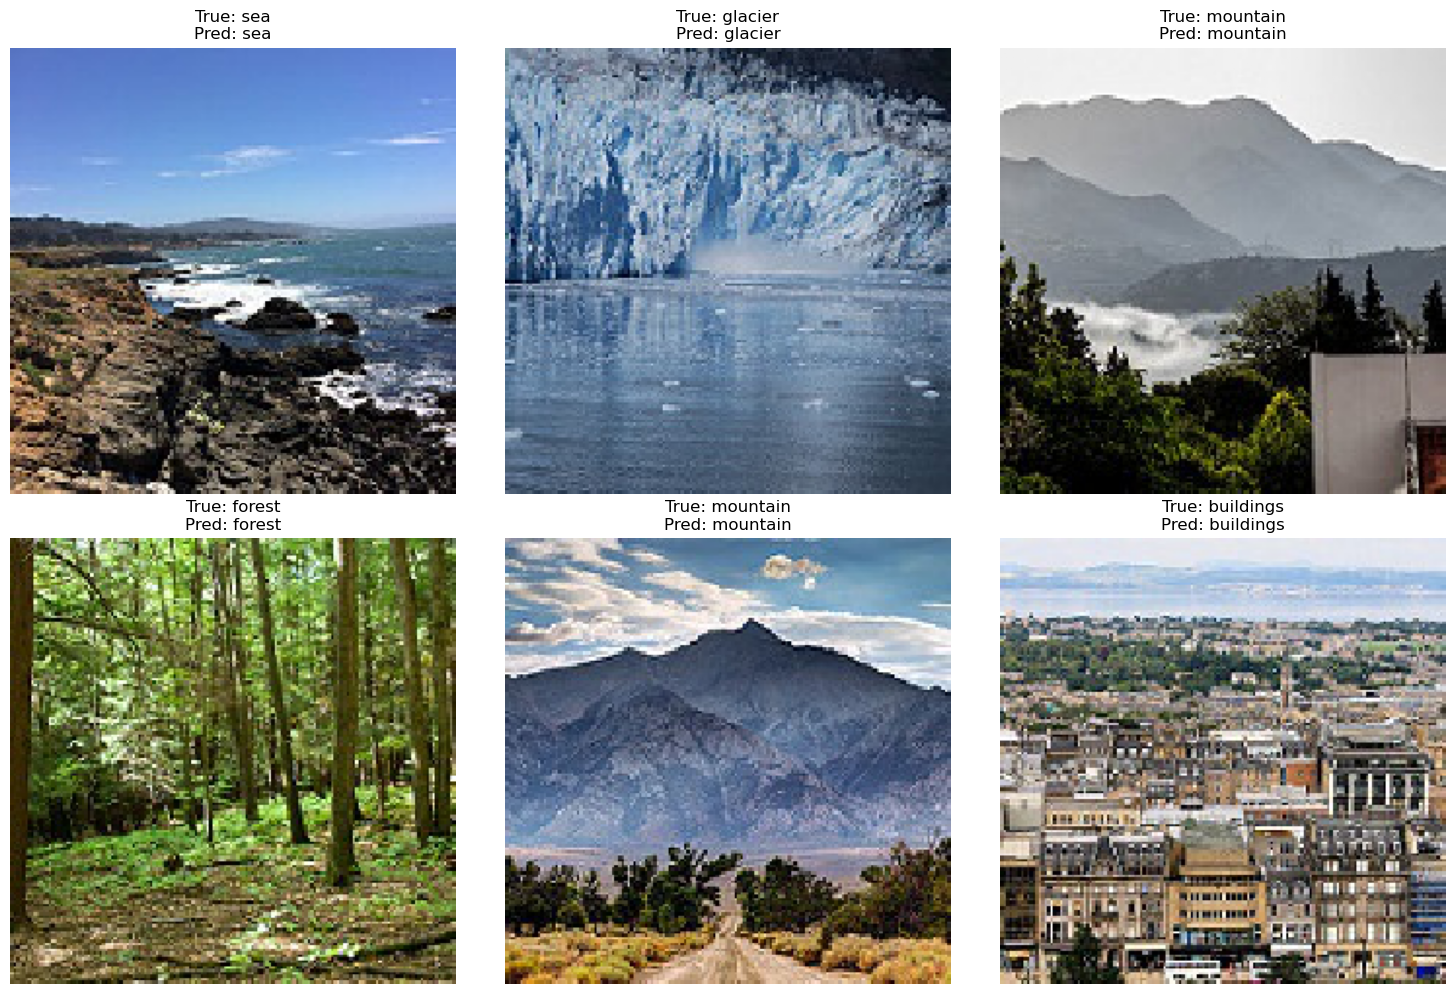

In [32]:
plt.figure(figsize=(15, 10))
for i in range(6):
    plt.subplot(2, 3, i+1)
    
    img = x_sample[i]
    if img.max() > 1.0:  # scale if needed
        img = img / 255.0

    plt.imshow(img)
    plt.title(f"True: {class_names[y_true_sample[i]]}\nPred: {class_names[y_pred_sample[i]]}")
    plt.axis('off')
plt.tight_layout()
plt.show()


In [20]:
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

def predict_image(img_path, model, class_names, target_size=(229, 229), true_label=None):
    # Load and preprocess image
    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    # Predict
    prediction = model.predict(img_array)
    predicted_class = class_names[np.argmax(prediction)]

    # Show image with label
    plt.figure(figsize=(3, 3))
    plt.imshow(img)
    title_text = f"Pred: {predicted_class}"
    if true_label:
        title_text = f"True: {true_label}\n" + title_text
    plt.title(title_text)
    plt.axis('off')
    plt.tight_layout()
    plt.show()

    return predicted_class


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


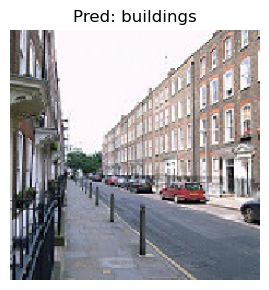

'buildings'

In [21]:
img_path = "D:/Engineering/6th Semester/Advanced AI and ML/Poster/Images/6.jpg"
predict_image(img_path, model,class_names)
